问题 1 蔬菜类商品不同品类或不同单品之间可能存在一定的关联关系，请分析蔬菜各品类及单品销售量的分布规律及相互关系
* 解题思路：利用关联规则、相关系数、卡方检验等方法检验品类之间的关系，然后就是简单的数据分析可视化
* 超市是否存在将商品打包进行打折销售？

关于品类和单品的分布规律，可以对六大品类进行可视化，然后每个品类选取销量前三和后三的单品进行可视化。可视化可以考虑从时间销量分布、总体销量分布（密度图、箱线图）

附件2中的销售数据只给出了扫码销售时间。实际上，一个超市进行销售的时候是会有多个营业台进行扫码的，这样就会导致一个问题，我们并不知道同一时刻间的扫码商品是否属于同一个订单，这给关联规则的发现产生了扰动。
* 一个可能的解决方案是，将这种扰动当作是随机的。我们将根据销售时间的间隔划分订单，即使在同一间隔内包含了不同的订单，我们也可以将这个情况视为“真实订单”被随机添加了某些蔬菜，这种随机添加蔬菜实际上并不太会影响关联规则的信息挖掘。

In [1]:
# 配置绘图设置
%config InlineBackend.figure_format = 'retina'  # 高分辨率图形
%matplotlib inline  # 在Jupyter Notebook中嵌入绘图

# 导入必要的库
import seaborn as sns  # 数据可视化库
sns.set(font="simhei", style="whitegrid", font_scale=1.6)  # 设置字体和样式
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决坐标轴的负号显示问题

import numpy as np  # 数值计算库
import pandas as pd  # 数据处理库
import matplotlib.pyplot as plt  # 绘图库

import plotly.express as px  # 交互式可视化库 Plotly Express

# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_excel('附件1.xlsx')
df2 = pd.read_excel('附件2.xlsx')

In [3]:
#df2 = df2.sample(20000)

In [4]:
df2 = pd.merge(df2,df1,on='单品编码')

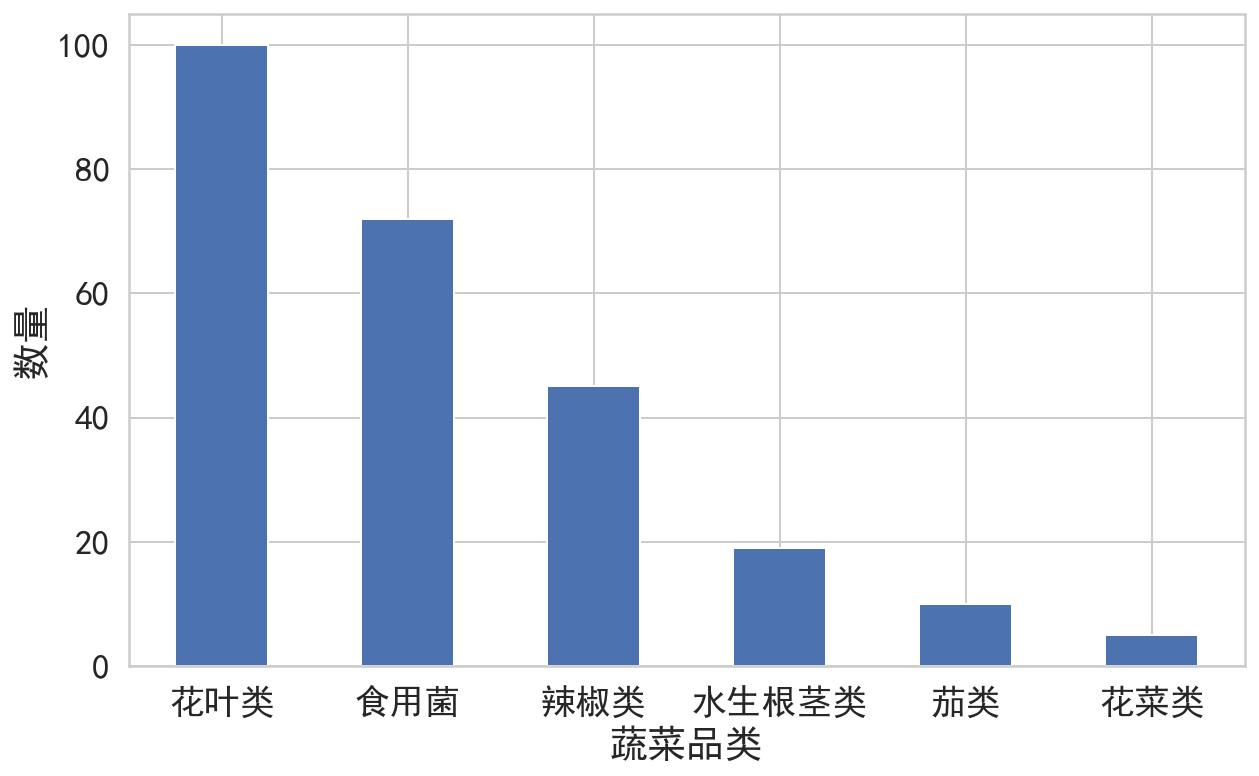

In [5]:
df1['分类名称'].value_counts().plot(kind="bar", figsize=(10, 6))  # 使用条形图展示不同蔬菜品类的数量分布
plt.xticks(rotation=0)  # 旋转x轴标签，使其水平显示
plt.xlabel("蔬菜品类")  # 设置x轴标签
plt.ylabel("数量")  # 设置y轴标签
plt.savefig('问题1\\不同品类单品分布.png', dpi=500)  # 保存图形为PNG格式，指定分辨率为500dpi
plt.show()  # 显示图形

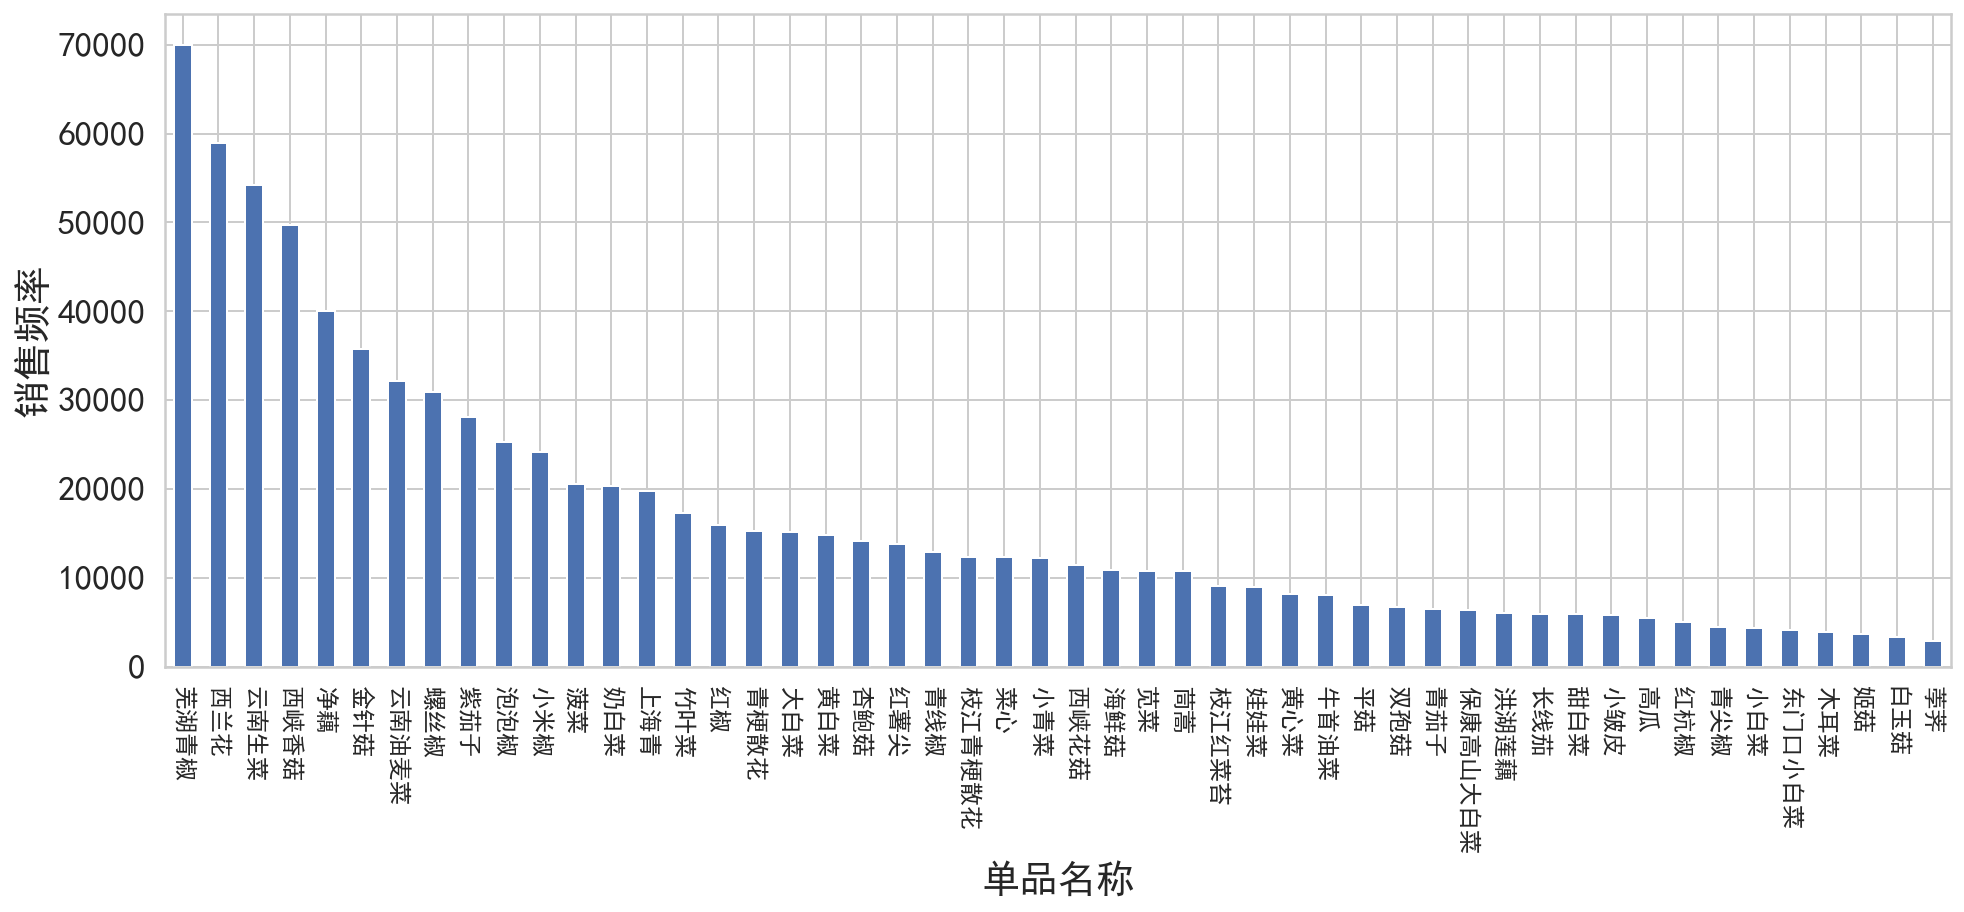

In [20]:
# 为了观察消费者购买品类，合并不同来源的单品
df2['单品名称(无来源)'] = [i.split('(')[0] for i in df2['单品名称']]

# 单品销售频率排序并绘制条形图
df2["单品名称(无来源)"].value_counts()[:50].plot(kind="bar", figsize=(16, 6))  # 使用条形图展示销售频率最高的前50个单品
plt.xlabel("单品名称")  # 设置x轴标签为“单品名称”
plt.ylabel("销售频率")  # 设置y轴标签为“销售频率”
plt.xticks(rotation=270, fontsize=12)  # 旋转x轴标签，使其垂直显示，设置标签字体大小
plt.savefig('问题1\\单品销售品类.png', dpi=500, bbox_inches='tight')  # 保存图形为PNG格式，指定分辨率为500dpi，bbox_inches='tight'用于确保图形保存完整
plt.show()  # 显示图形


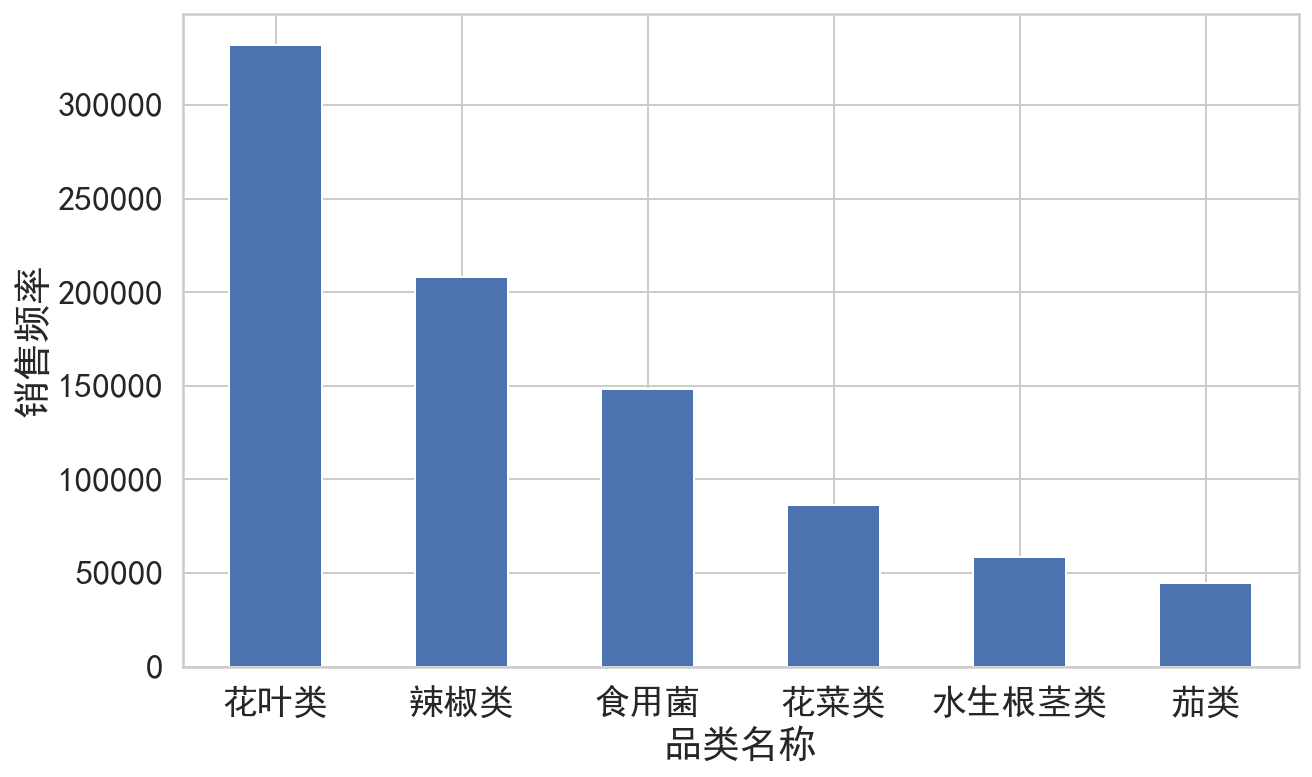

In [14]:
# 统计不同品类的销售频率并绘制条形图
df2["分类名称"].value_counts()[:50].plot(kind="bar", figsize=(10, 6))  # 使用条形图展示销售频率最高的前50个品类
plt.xlabel("品类名称")  # 设置x轴标签为“品类名称”
plt.ylabel("销售频率")  # 设置y轴标签为“销售频率”
plt.xticks(rotation=0)  # 不旋转x轴标签
plt.savefig('问题1\\品类销售频率.png', dpi=500)  # 保存图形为PNG格式，指定分辨率为500dpi
plt.show()  # 显示图形


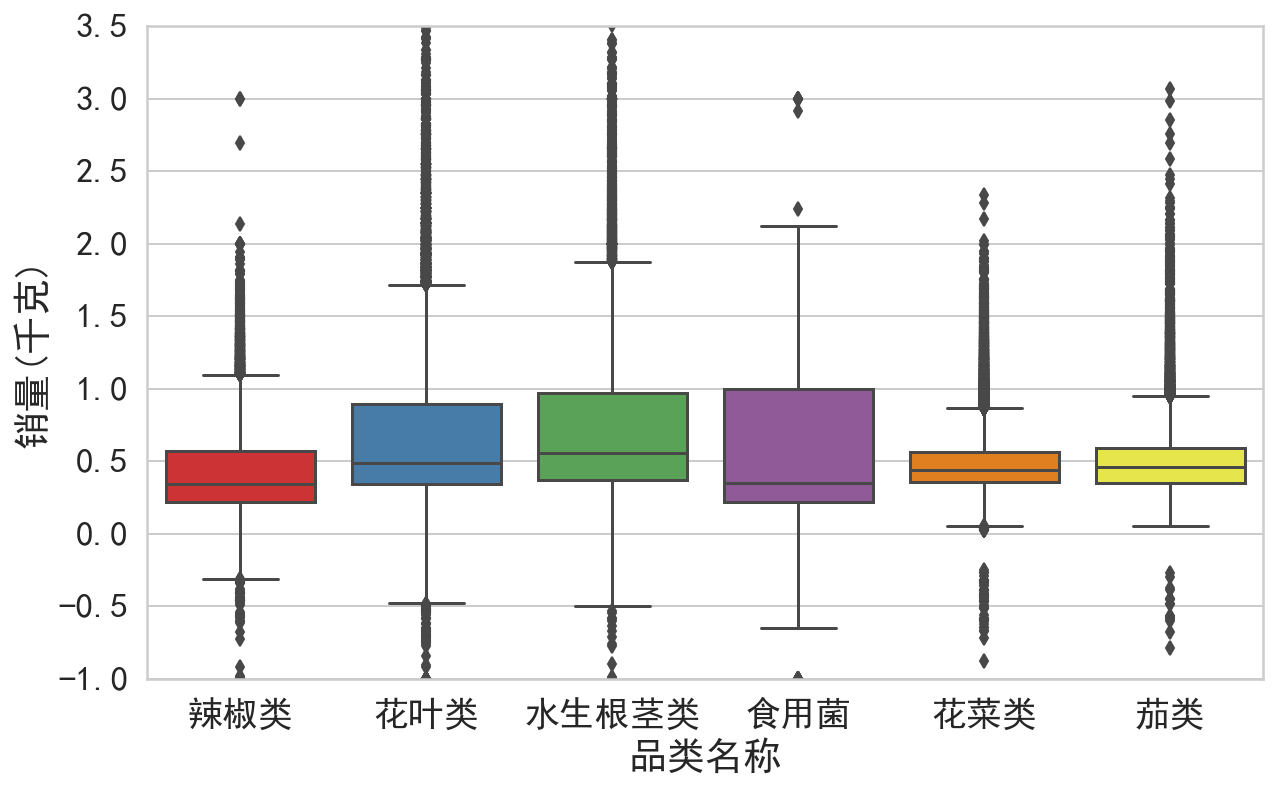

In [9]:
# 创建一个箱线图，展示不同品类的购买量分布情况
plt.figure(figsize=(10, 6))  # 创建一个大小为10x6英寸的图形
sns.boxplot(data=df2, x="分类名称", y="销量(千克)", palette="Set1")  # 使用箱线图展示不同品类的购买量分布
plt.xlabel("品类名称")  # 设置x轴标签为“品类名称”
plt.ylim(-1, 3.5)  # 设置y轴的显示范围在-1到3.5之间
plt.savefig('问题1\\品类销量箱线图.png', dpi=500)  # 保存生成的图形为PNG格式文件，指定分辨率为500dpi
plt.show()  # 显示箱线图


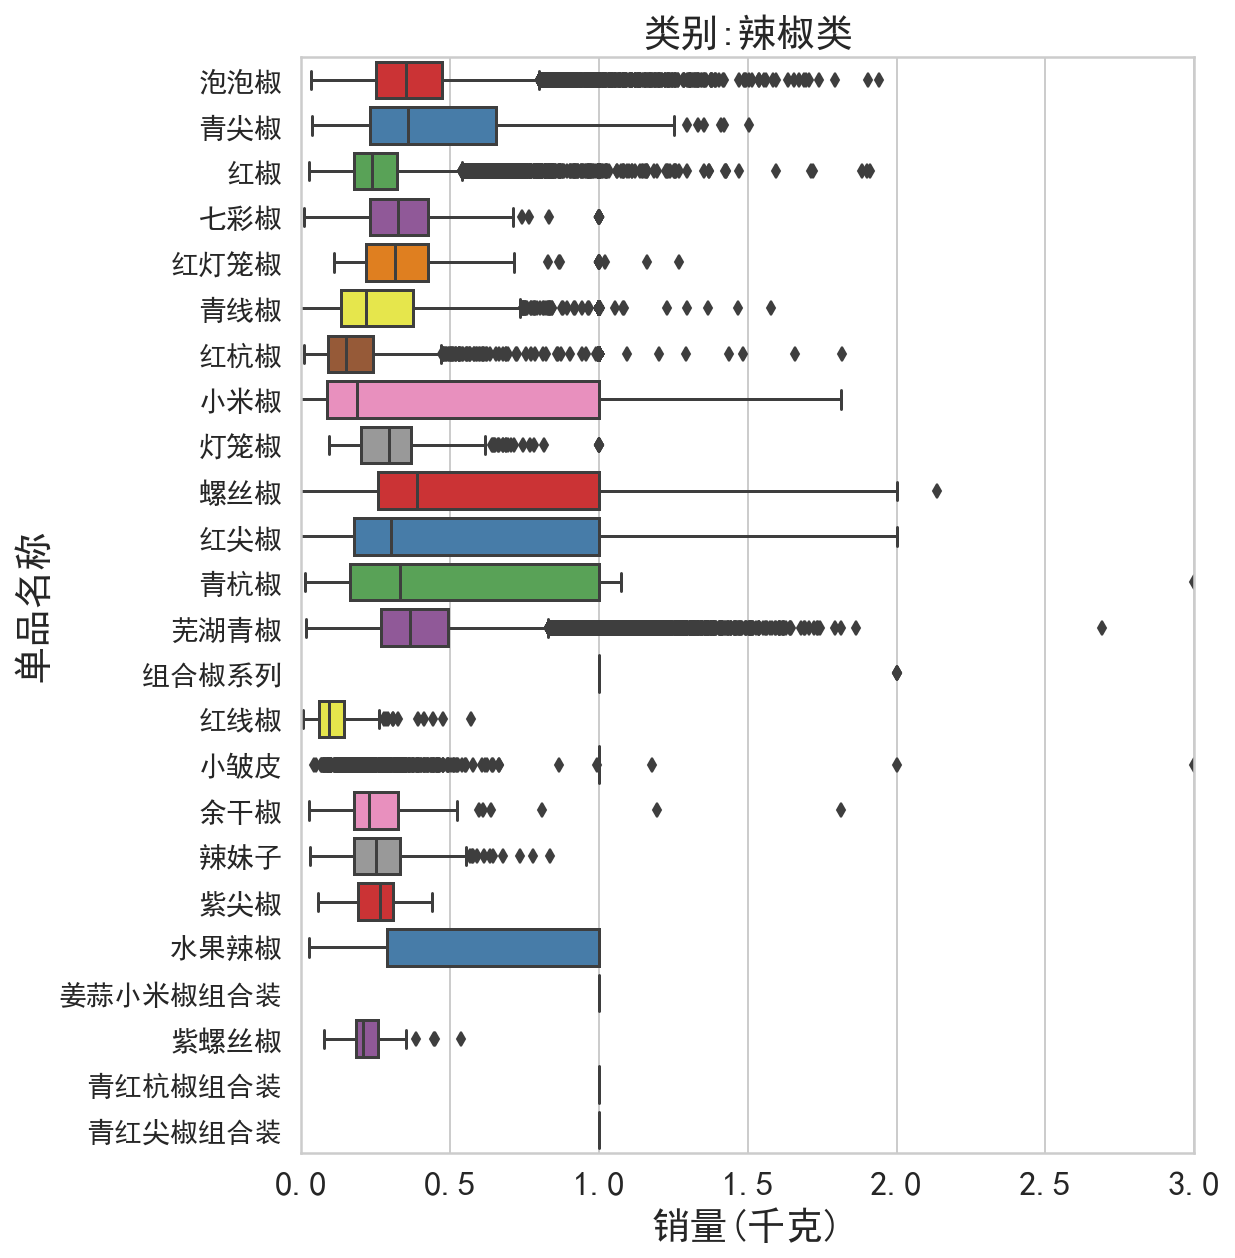

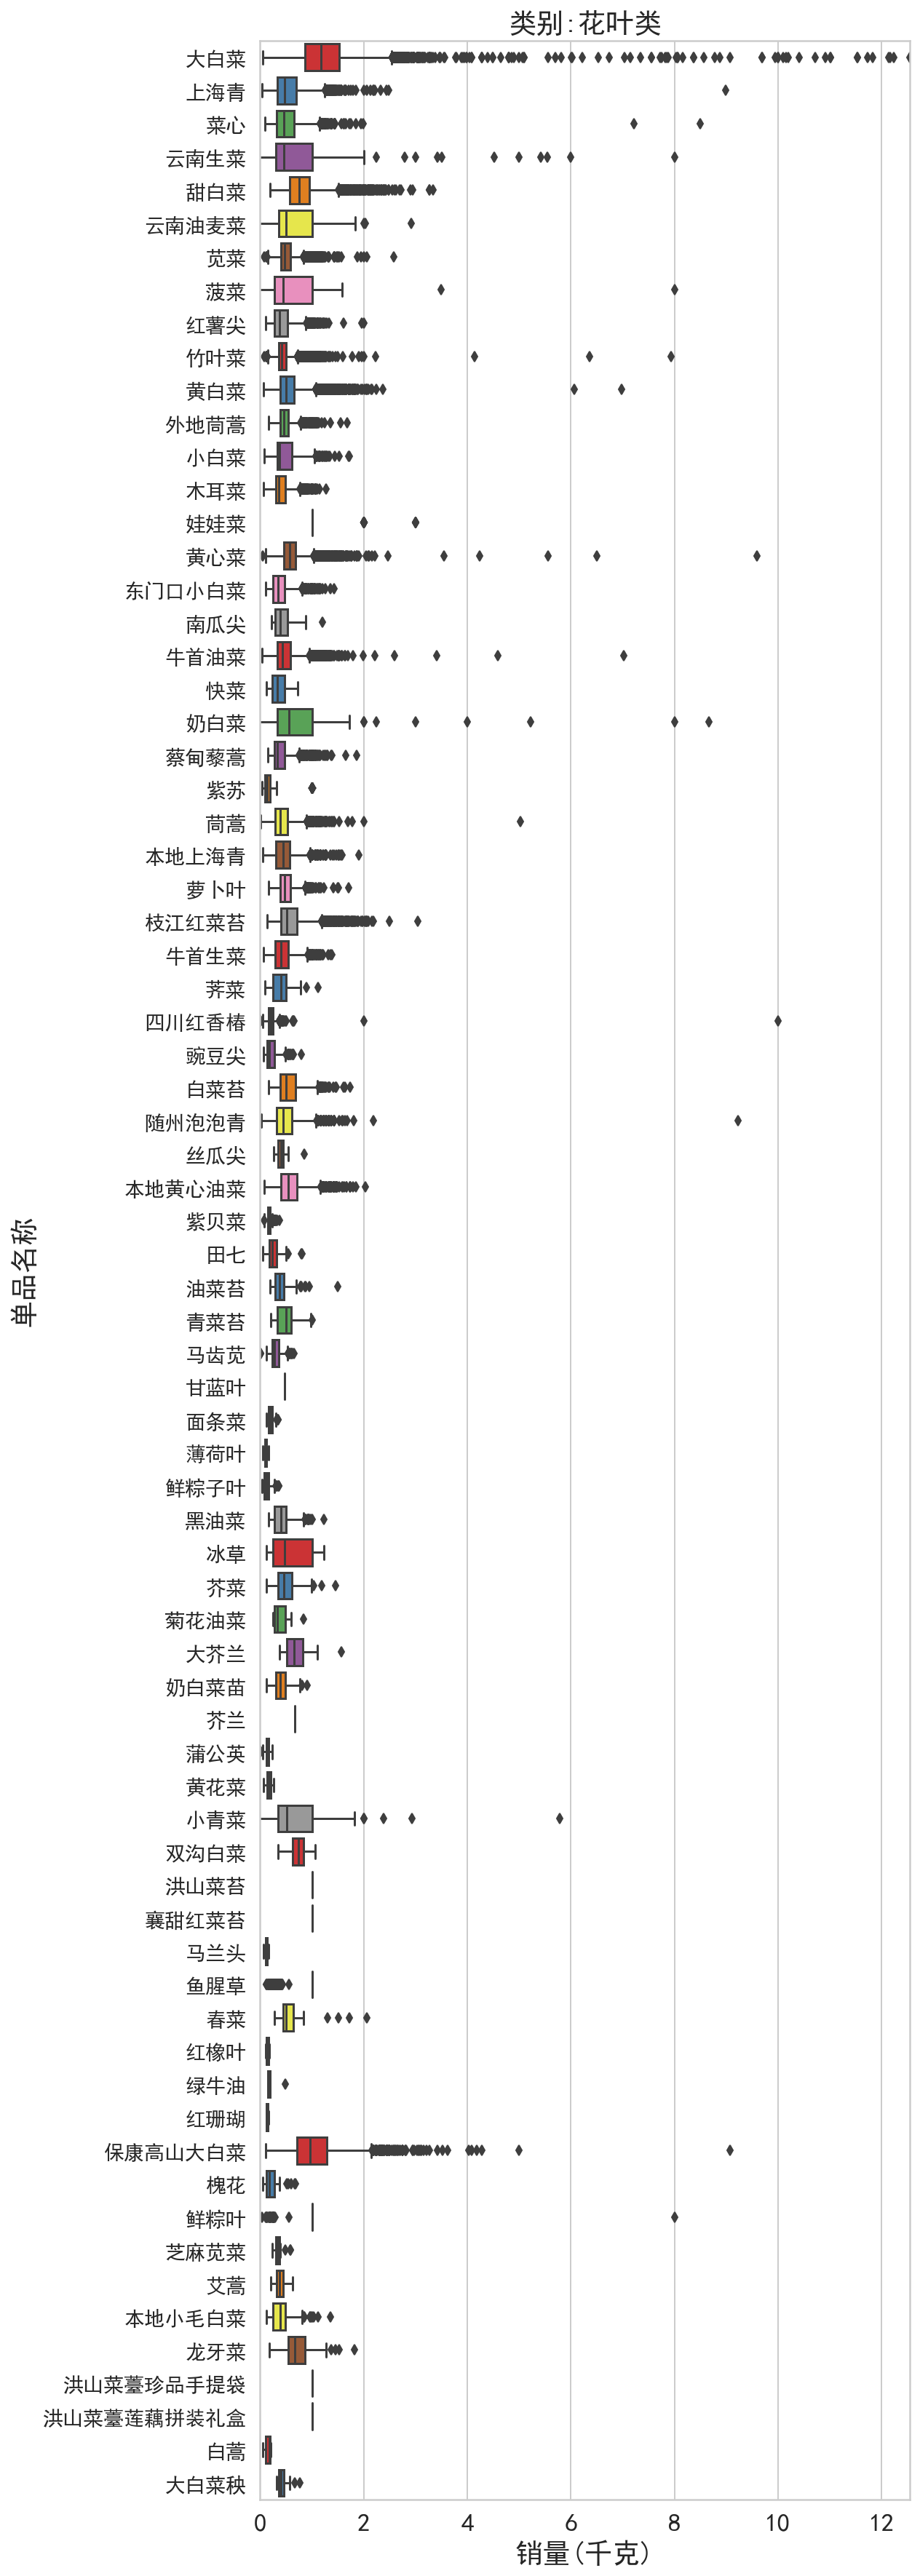

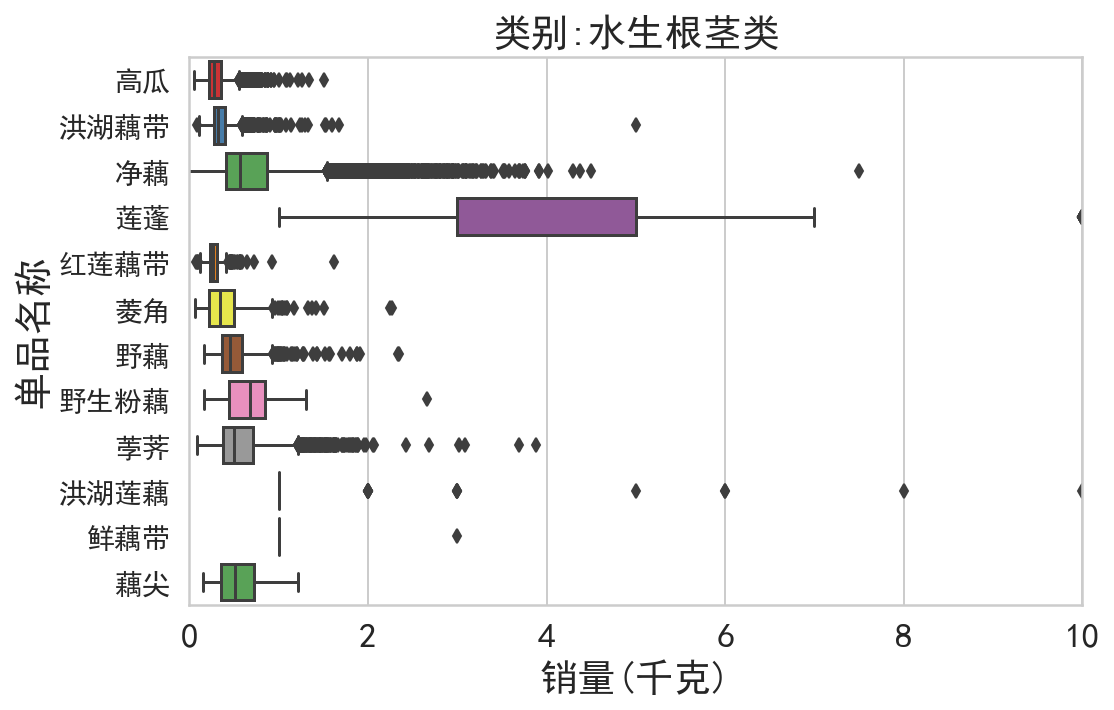

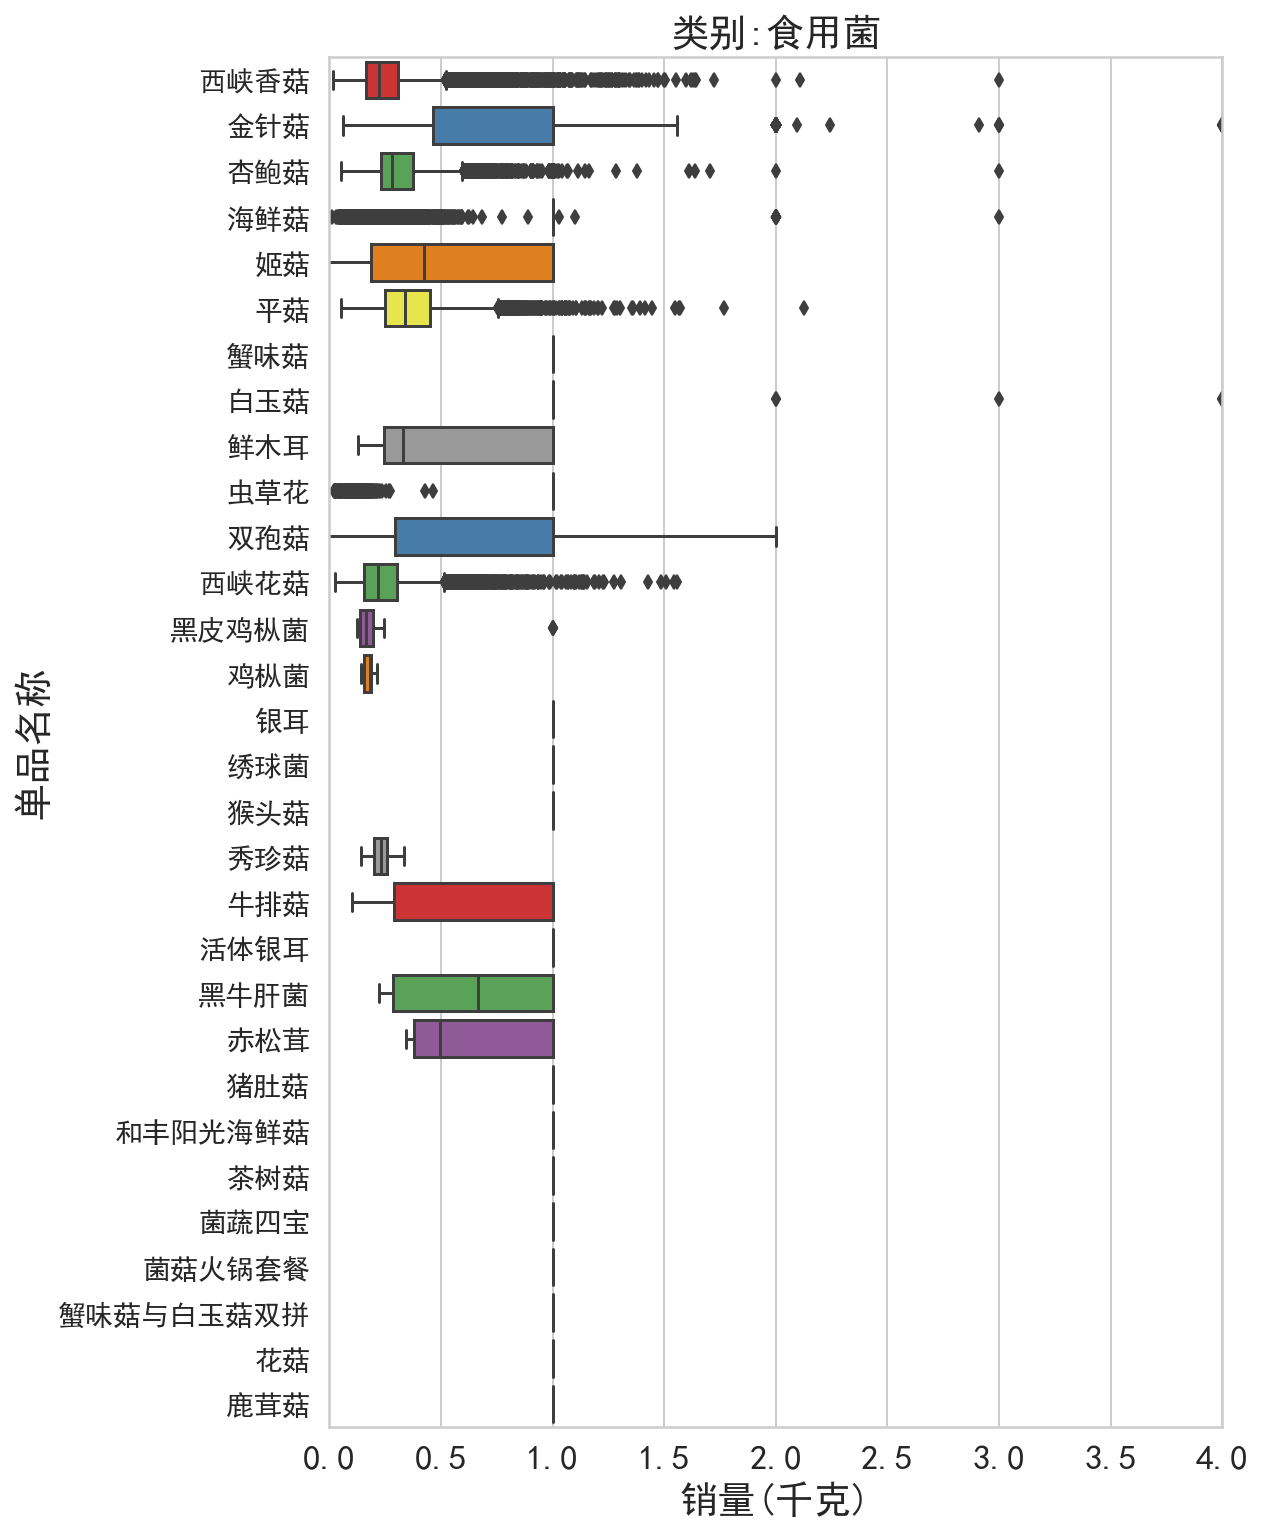

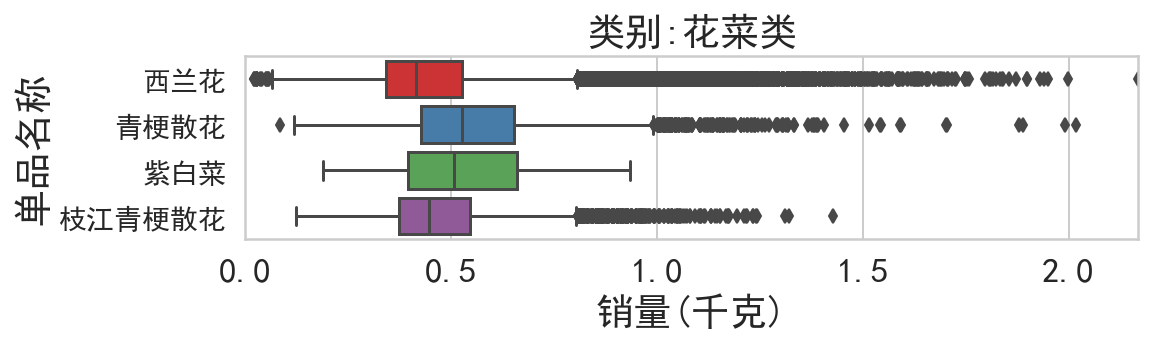

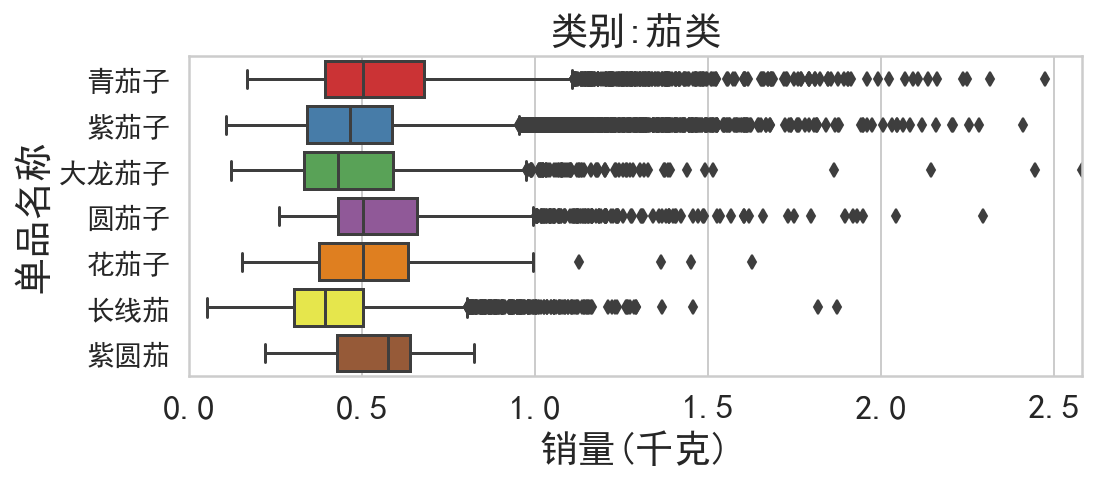

In [22]:
# 针对不同品类下的单品销量情况绘制箱线图
for i in df2['分类名称'].unique():  # 遍历不同的品类名称
    tem = df2[df2.分类名称 == i]  # 选择当前品类的数据子集
    plt.figure(figsize=(8, 0.42 * len(tem['单品名称(无来源)'].unique())))  # 创建一个图形，高度基于不同单品数量而变化
    sns.boxplot(data=tem, y="单品名称(无来源)", x="销量(千克)", palette="Set1")  # 使用箱线图展示不同单品的销量情况
    plt.ylabel('单品名称')  # 设置y轴标签为“单品名称”
    plt.title(f'类别:{i}')  # 设置图形标题，标题中包含当前品类的名称
    plt.yticks(fontsize=14)  # 设置y轴刻度标签的字体大小
    plt.xlim(0, tem['销量(千克)'].sort_values().values[-10])  # 设置x轴的显示范围，以便查看销量较大的单品
    name = f'问题1\\类别{i}单品销售箱线图.png'  # 生成文件名
    plt.savefig(name, dpi=500, bbox_inches='tight')  # 保存生成的箱线图为PNG格式文件，指定分辨率为500dpi，确保图形边界适合内容
    plt.show()  # 显示箱线图


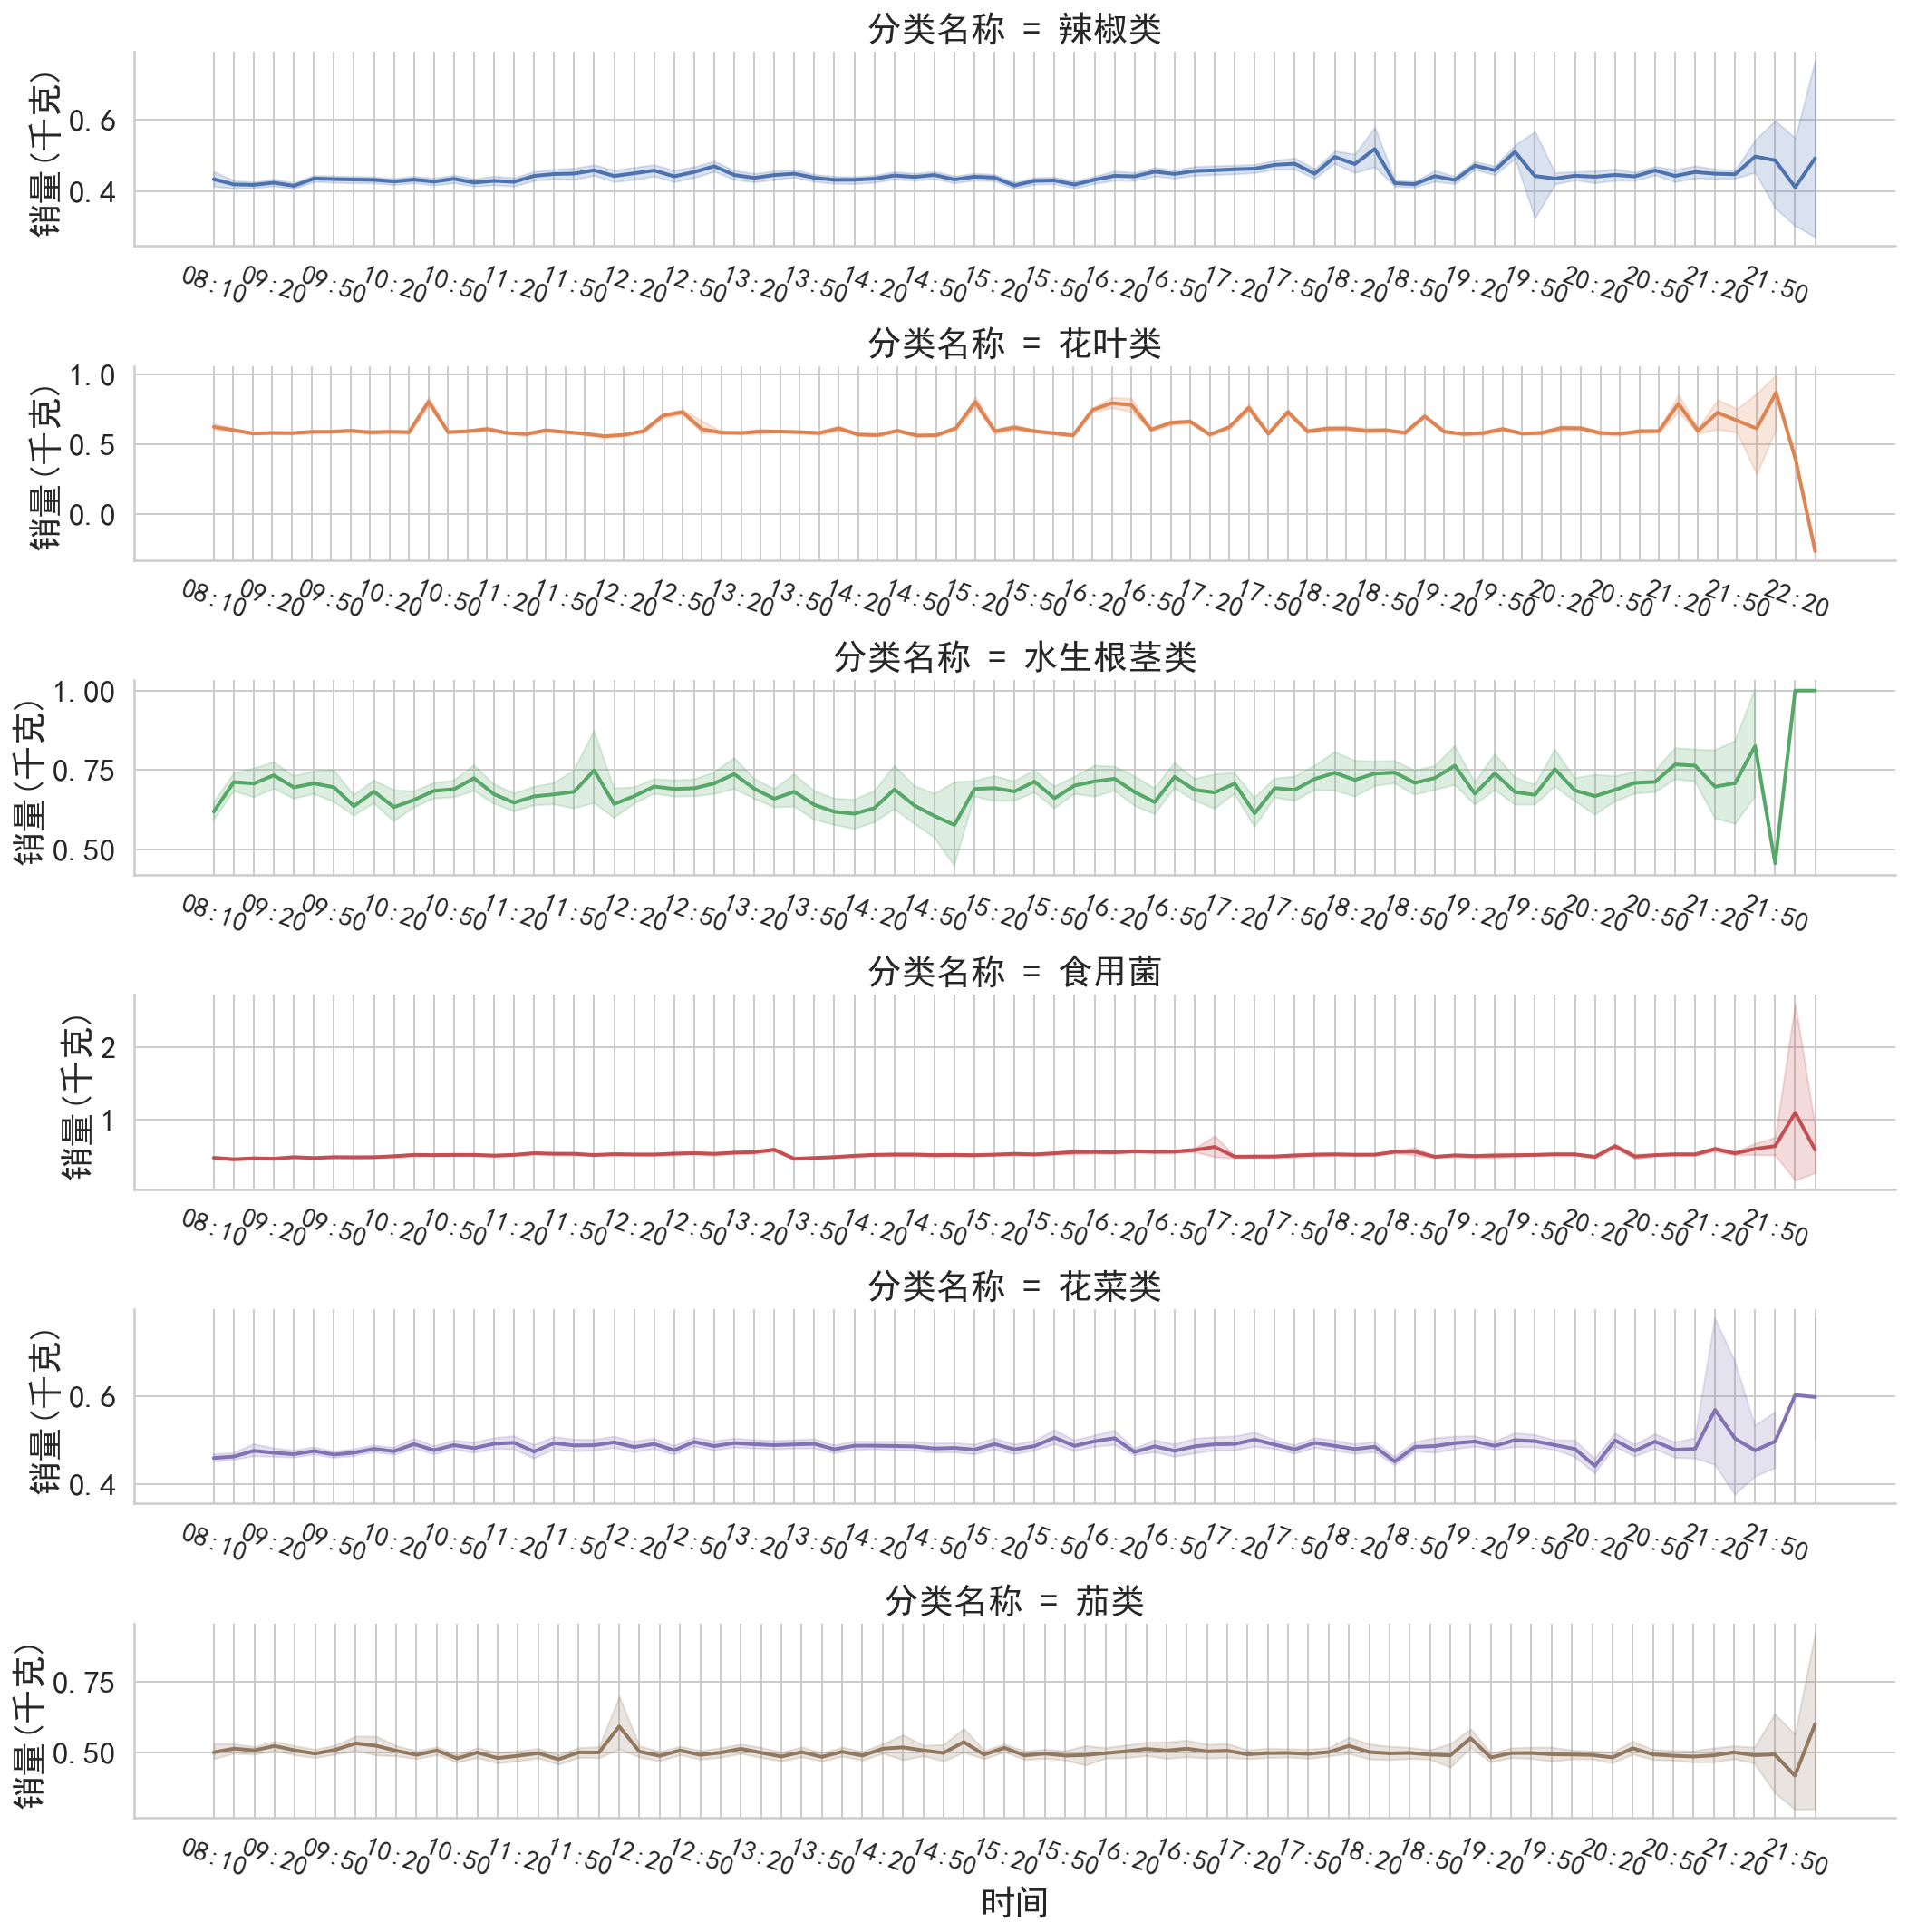

In [270]:
# 创建品类的时间销售规律可视化
df2['time'] = [i[:4] + '0' for i in df2['扫码销售时间']]  # 提取销售时间的年份和月份，以便按时间分组
g = sns.FacetGrid(data=df2, row="分类名称", hue="分类名称",
                  height=2.5, aspect=6, sharex=False, sharey=False)  # 创建一个FacetGrid对象，用于绘制多个子图
g = g.map(sns.lineplot, "time", "销量(千克)", palette="Set1", lw=2)  # 在子图上绘制销量随时间的折线图，使用不同的颜色表示不同品类

# 调整x轴刻度标签，以更好地显示时间信息
for index1, i in enumerate(df2['分类名称'].unique()):
    a = df2['time'].sort_values().unique()
    ls = []
    for index, i in enumerate(a):
        if index % 3 == 0:
            ls.append(i)
        else:
            ls.append('')
    g.axes[index1][0].set_xticklabels(ls, rotation=340, fontsize=15)

plt.xlabel('时间')  # 设置x轴标签为“时间”
plt.savefig('问题1\\不同品类时间分布规律.png', dpi=500)  # 保存生成的图形为PNG格式文件


In [271]:
# 数据准备：为关联规则分析做准备
# 1. 将数据按销售日期和销售时间排序
df2 = df2.sort_values(by=['销售日期', '扫码销售时间'])

# 2. 创建一个新的时间列"time"，将销售日期和销售时间合并为一个时间戳
df2['time'] = [pd.to_datetime(i) for i in df2['销售日期'].astype('str') + ' ' + df2['扫码销售时间']]

# 3. 计算相邻销售记录之间的时间间隔（秒数间隔），并将结果存储在"秒数间隔"列中
df2['秒数间隔'] = df2['time'] - df2['time'].shift(1)
df2['秒数间隔'] = [i / pd.Timedelta(1, 'S') for i in df2['秒数间隔']]

# 4. 创建一个新的列"订单"，标识不同的订单编号
ls = []
n = 1
for index, i in enumerate(df2['秒数间隔'].values):
    if index == 0:
        ls.append(n)
    else:
        if i < 10:
            ls.append(n)
        else:
            n += 1
            ls.append(n)
df2['订单'] = ls

# 5. 创建一个包含每个订单中购买的单品的列表的数据结构
ls = []
for i in df2['订单'].unique():
    t = []
    for o in df2[df2.订单 == i]['单品名称(无来源)'].values:
        t.append(o)
    ls.append(t)

ls

[['泡泡椒'],
 ['大白菜', '泡泡椒'],
 ['上海青'],
 ['菜心'],
 ['泡泡椒', '云南生菜', '泡泡椒', '云南生菜'],
 ['甜白菜', '高瓜'],
 ['云南油麦菜', '西峡香菇'],
 ['云南油麦菜'],
 ['青尖椒'],
 ['高瓜'],
 ['云南生菜'],
 ['西峡香菇'],
 ['红椒', '云南油麦菜'],
 ['云南油麦菜'],
 ['菜心'],
 ['云南生菜', '云南生菜', '苋菜', '西兰花'],
 ['菜心', '菠菜'],
 ['西峡香菇'],
 ['云南油麦菜'],
 ['青梗散花', '云南生菜', '七彩椒', '红灯笼椒'],
 ['云南油麦菜'],
 ['云南生菜'],
 ['泡泡椒'],
 ['青线椒', '泡泡椒'],
 ['云南油麦菜'],
 ['云南油麦菜', '青线椒'],
 ['大白菜'],
 ['金针菇'],
 ['云南油麦菜'],
 ['金针菇'],
 ['云南油麦菜', '西兰花'],
 ['云南油麦菜', '洪湖藕带', '青梗散花', '菜心'],
 ['云南生菜'],
 ['金针菇', '西兰花'],
 ['甜白菜'],
 ['西峡香菇'],
 ['云南油麦菜'],
 ['云南油麦菜'],
 ['金针菇', '红薯尖', '杏鲍菇'],
 ['竹叶菜'],
 ['青梗散花'],
 ['大白菜'],
 ['青梗散花'],
 ['西兰花', '泡泡椒', '黄白菜'],
 ['红薯尖', '泡泡椒'],
 ['云南生菜', '青茄子'],
 ['泡泡椒'],
 ['青茄子', '苋菜', '黄白菜'],
 ['红薯尖'],
 ['云南油麦菜'],
 ['西兰花'],
 ['云南油麦菜'],
 ['青茄子'],
 ['苋菜'],
 ['西峡香菇'],
 ['云南生菜', '青茄子'],
 ['云南油麦菜'],
 ['西峡香菇'],
 ['青线椒', '泡泡椒', '红杭椒', '大白菜'],
 ['西兰花', '紫茄子'],
 ['小米椒'],
 ['云南生菜'],
 ['小米椒'],
 ['杏鲍菇'],
 ['云南生菜'],
 ['青梗散花', '杏鲍菇'],
 ['红杭椒'],
 ['大白菜', '泡泡椒', '杏鲍菇'],
 ['云南生菜', '西兰花'

In [273]:
# 导入必要的库
import pandas as pd
from IPython.display import display

# 定义最小支持度和最小置信度
min_sup = 50
min_conf = 0.6

# 定义最大项集大小
K = 5

# 读入购物篮数据
data_set = ls  # 这里的"ls"是购物篮数据，格式为列表的列表

# 构建1-项集
C1 = set()
for t in data_set:
    for item in t:
        item_set = frozenset([item])
        C1.add(item_set)

# 计算给定数据每项及其支持数，第一次
item_count = {}
for data in data_set:
    for item in C1:
        if item.issubset(data):
            if item in item_count:
                item_count[item] += 1
            else:
                item_count[item] = 1

# 生成剪枝后的L1
L1 = {}
for i in item_count:
    if item_count[i] >= min_sup:
        L1[i] = item_count[i]

# 连接、扫描、计数、剪枝，重复4-6，直到得到最终的K项频繁项集
Lk_copy = L1.copy()
L = []
L.append(Lk_copy)
for z in range(2, K + 1):
    Ck = set()
    len_Lk_copy = len(Lk_copy)
    list_Lk_copy = list(Lk_copy)
    for i in range(len_Lk_copy):
        for j in range(1, len_Lk_copy):
            l1 = list(list_Lk_copy[i])
            l2 = list(list_Lk_copy[j])
            l1.sort()
            l2.sort()
            if l1[0:z-2] == l2[0:z-2]:
                Ck_item = list_Lk_copy[i] | list_Lk_copy[j]
                # 扫描前一个项集，剪枝
                for item in Ck_item:
                    sub_Ck = Ck_item - frozenset([item])
                    if sub_Ck not in Lk_copy:
                        p = False
                    else:
                        p = True
                if p == True:
                    Ck.add(Ck_item)
    Ci = Ck
    item_count = {}
    for data in data_set:
        for item in Ck:
            if item.issubset(data):
                if item in item_count:
                    item_count[item] += 1
                else:
                    item_count[item] = 1
    Lk2 = {}
    for i in item_count:
        if item_count[i] >= min_sup:
            Lk2[i] = item_count[i]
    Li = Lk2
    Lk_copy = Li.copy()
    L.append(Lk_copy)

# 输出频繁项集及其支持度数
ls = []
sup = []
support_data = {}
for item in L:
    for i in item:
        ls.append(list(i))
        sup.append(item[i])
        support_data[i] = item[i]

# 创建频繁项集数据框
fre_data = pd.DataFrame({'频繁项集': ls, '支持度计数': sup})
fre_data['len'] = [len(i) for i in fre_data['频繁项集']]

# 输出强关联规则
strong_rule_list = []
sub_set_list = []
for i in range(0, len(L)):
    for freq_set in L[i]:
        for sub_set in sub_set_list:
            if sub_set.issubset(freq_set):
                # 计算包含 X 的交易数
                sub_set_num = 0
                for item in data_set:
                    if (freq_set - sub_set).issubset(item):
                        sub_set_num += 1
                conf = support_data[freq_set] / sub_set_num
                strong_rule = (freq_set - sub_set, sub_set, conf)
                if conf >= min_conf and strong_rule not in strong_rule_list:
                    strong_rule_list.append(strong_rule)
        sub_set_list.append(freq_set)

# 对每个关联规则计算置信度，保留大于最小置信度的频繁项为强关联规则
strong_rules_list = strong_rule_list
strong_rules_list.sort(key=lambda result: result[2], reverse=True)

# 创建强关联规则数据框
ls = []
conf = []
for item in strong_rules_list:
    try:
        ls.append(sorted(list(item[0]) + list(item[1])))
    except:
        ls.append(list(item[0]) + list(item[1]))
    conf.append(item[2])

relation = pd.DataFrame({'强关联的集': ls, 'conf': conf})


,频繁项集,支持度计数
0,[泡泡椒],24234
1,[大白菜],13524
2,[上海青],19042
3,[菜心],11829
4,[云南生菜],51973
...,...,...
3446,"[芜湖青椒, 奶白菜, 西兰花, 金针菇]",51
3447,"[小青菜, 芜湖青椒, 西峡香菇, 净藕]",55
3448,"[小青菜, 芜湖青椒, 西兰花, 净藕]",55
3449,"[芜湖青椒, 小青菜, 西峡香菇, 西兰花]",55



Strong association rule


,强关联的集,conf
